# Solar Power Forecasting



## 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing the Dataset

In [2]:
data = pd.read_csv('dataset.csv')
data.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


<AxesSubplot:>

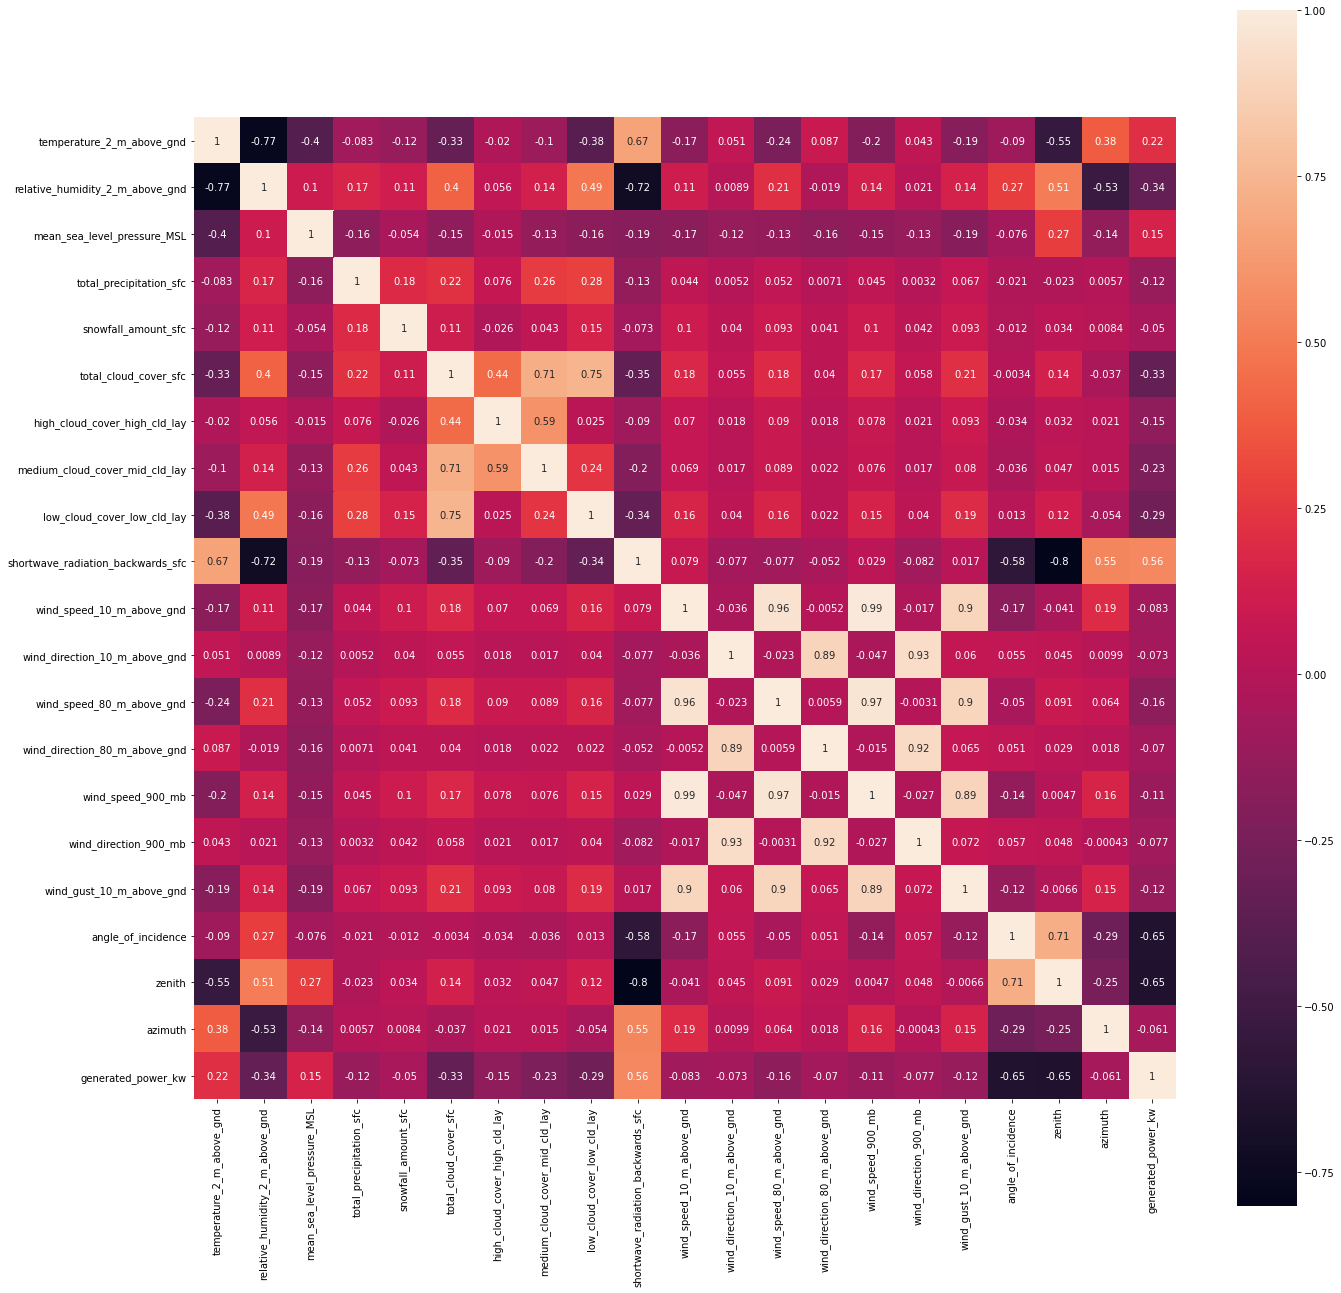

In [3]:
corr_heat = data.corr()
plt.figure(figsize = (22,22))
sns.heatmap(corr_heat, annot = True, square = True)

In [4]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.reshape(y, (-1,1))
print(x.shape, y.shape)

(4213, 20) (4213, 1)


In [5]:
x

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [6]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

## 3. Splitting the Dataset

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("Train Shape: {} {} \nTest Shape: {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Train Shape: (3370, 20) (3370, 1) 
Test Shape: (843, 20) (843, 1)


## 4. Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)
y_sc = StandardScaler()
y_train = y_sc.fit_transform(y_train)    
y_test = y_sc.transform(y_test)
x_train

array([[ 0.0624842 , -0.09917623, -0.52456123, ..., -1.03497678,
        -1.27938413,  0.66984885],
       [ 0.04560208, -0.09917623, -1.69753564, ...,  0.31280146,
        -0.28261253, -1.07329772],
       [ 1.0956696 , -0.48037188, -1.11811455, ..., -1.22694198,
        -1.61545465,  0.22712454],
       ...,
       [ 1.15194332, -1.20040812, -1.2170401 , ..., -0.53432461,
        -1.52146678, -0.71815314],
       [ 1.61901515, -1.708669  , -0.90613122, ..., -0.58907873,
        -1.27254794, -0.66887263],
       [ 1.07878749, -0.6074371 , -1.10398233, ..., -0.54447434,
        -1.05518992,  1.01443003]])

In [9]:
x_test

array([[-1.37924838,  0.4937948 ,  1.27023093, ..., -1.32677775,
        -0.43933851, -0.13616017],
       [ 1.23747936, -0.94627768, -0.58109012, ..., -0.59206432,
        -0.80882551,  0.95512003],
       [ 0.24481103,  0.70557016, -0.12885902, ...,  0.95884414,
         0.16115839, -1.34524075],
       ...,
       [-2.01063946,  1.80680206,  2.5421309 , ..., -0.20130036,
         0.35999534, -0.59679203],
       [-1.18791775,  1.00205567, -1.73993231, ..., -0.73238608,
         0.18806001,  0.65493302],
       [-1.47941559,  0.9597006 ,  1.29849538, ..., -1.31021877,
        -0.3840584 , -0.13285821]])

In [10]:
y_train

array([[-0.38398918],
       [-0.70895973],
       [ 1.6760608 ],
       ...,
       [-0.86387004],
       [ 1.42181917],
       [-0.25836479]])

## 5. Building the Model

In [11]:
def create_solcast(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i == 0:
      model.add(Dense(nodes, kernel_initializer = kernels, activation = n_activation, input_dim = x_train.shape[1]))
    else:
      model.add(Dense(nodes, activation = n_activation, kernel_initializer = kernels))  
  model.add(Dense(1))
  model.compile(loss = 'mse', 
                optimizer = 'adam',
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  return model

solcast = create_solcast([32, 64], 'relu', 'normal')
solcast.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


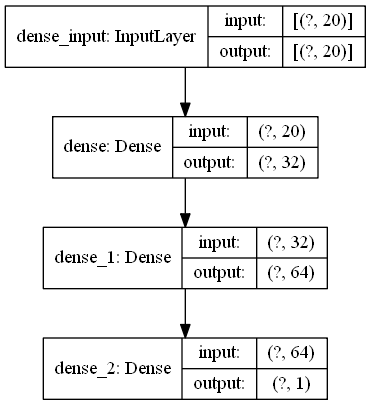

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(solcast, show_shapes = True, show_layer_names = True)

In [13]:
hist = solcast.fit(x_train, y_train, batch_size = 32, validation_data = (x_test, y_test), epochs = 250, verbose = 2)

Epoch 1/250
106/106 - 1s - loss: 0.4578 - root_mean_squared_error: 0.6766 - val_loss: 0.2735 - val_root_mean_squared_error: 0.5230
Epoch 2/250
106/106 - 0s - loss: 0.2440 - root_mean_squared_error: 0.4939 - val_loss: 0.2619 - val_root_mean_squared_error: 0.5118
Epoch 3/250
106/106 - 0s - loss: 0.2319 - root_mean_squared_error: 0.4816 - val_loss: 0.2503 - val_root_mean_squared_error: 0.5003
Epoch 4/250
106/106 - 0s - loss: 0.2267 - root_mean_squared_error: 0.4761 - val_loss: 0.2555 - val_root_mean_squared_error: 0.5055
Epoch 5/250
106/106 - 0s - loss: 0.2201 - root_mean_squared_error: 0.4692 - val_loss: 0.2475 - val_root_mean_squared_error: 0.4975
Epoch 6/250
106/106 - 0s - loss: 0.2165 - root_mean_squared_error: 0.4652 - val_loss: 0.2551 - val_root_mean_squared_error: 0.5050
Epoch 7/250
106/106 - 0s - loss: 0.2100 - root_mean_squared_error: 0.4582 - val_loss: 0.2493 - val_root_mean_squared_error: 0.4993
Epoch 8/250
106/106 - 0s - loss: 0.2055 - root_mean_squared_error: 0.4533 - val_los

Epoch 64/250
106/106 - 0s - loss: 0.1250 - root_mean_squared_error: 0.3536 - val_loss: 0.2611 - val_root_mean_squared_error: 0.5110
Epoch 65/250
106/106 - 0s - loss: 0.1278 - root_mean_squared_error: 0.3575 - val_loss: 0.2305 - val_root_mean_squared_error: 0.4801
Epoch 66/250
106/106 - 0s - loss: 0.1226 - root_mean_squared_error: 0.3501 - val_loss: 0.2317 - val_root_mean_squared_error: 0.4814
Epoch 67/250
106/106 - 0s - loss: 0.1208 - root_mean_squared_error: 0.3476 - val_loss: 0.2367 - val_root_mean_squared_error: 0.4866
Epoch 68/250
106/106 - 0s - loss: 0.1238 - root_mean_squared_error: 0.3519 - val_loss: 0.2349 - val_root_mean_squared_error: 0.4847
Epoch 69/250
106/106 - 0s - loss: 0.1208 - root_mean_squared_error: 0.3476 - val_loss: 0.2377 - val_root_mean_squared_error: 0.4875
Epoch 70/250
106/106 - 0s - loss: 0.1235 - root_mean_squared_error: 0.3515 - val_loss: 0.2365 - val_root_mean_squared_error: 0.4863
Epoch 71/250
106/106 - 0s - loss: 0.1211 - root_mean_squared_error: 0.3479 -

Epoch 126/250
106/106 - 0s - loss: 0.0975 - root_mean_squared_error: 0.3123 - val_loss: 0.2445 - val_root_mean_squared_error: 0.4945
Epoch 127/250
106/106 - 0s - loss: 0.0926 - root_mean_squared_error: 0.3042 - val_loss: 0.2462 - val_root_mean_squared_error: 0.4962
Epoch 128/250
106/106 - 0s - loss: 0.0935 - root_mean_squared_error: 0.3057 - val_loss: 0.2516 - val_root_mean_squared_error: 0.5016
Epoch 129/250
106/106 - 0s - loss: 0.0935 - root_mean_squared_error: 0.3058 - val_loss: 0.2421 - val_root_mean_squared_error: 0.4920
Epoch 130/250
106/106 - 0s - loss: 0.0915 - root_mean_squared_error: 0.3025 - val_loss: 0.2418 - val_root_mean_squared_error: 0.4917
Epoch 131/250
106/106 - 0s - loss: 0.0924 - root_mean_squared_error: 0.3040 - val_loss: 0.2426 - val_root_mean_squared_error: 0.4926
Epoch 132/250
106/106 - 0s - loss: 0.0891 - root_mean_squared_error: 0.2985 - val_loss: 0.2387 - val_root_mean_squared_error: 0.4885
Epoch 133/250
106/106 - 0s - loss: 0.0895 - root_mean_squared_error: 

Epoch 188/250
106/106 - 0s - loss: 0.0728 - root_mean_squared_error: 0.2698 - val_loss: 0.2533 - val_root_mean_squared_error: 0.5033
Epoch 189/250
106/106 - 0s - loss: 0.0716 - root_mean_squared_error: 0.2676 - val_loss: 0.2543 - val_root_mean_squared_error: 0.5043
Epoch 190/250
106/106 - 0s - loss: 0.0715 - root_mean_squared_error: 0.2673 - val_loss: 0.2511 - val_root_mean_squared_error: 0.5011
Epoch 191/250
106/106 - 0s - loss: 0.0729 - root_mean_squared_error: 0.2701 - val_loss: 0.2599 - val_root_mean_squared_error: 0.5099
Epoch 192/250
106/106 - 0s - loss: 0.0710 - root_mean_squared_error: 0.2664 - val_loss: 0.2518 - val_root_mean_squared_error: 0.5018
Epoch 193/250
106/106 - 0s - loss: 0.0740 - root_mean_squared_error: 0.2720 - val_loss: 0.2605 - val_root_mean_squared_error: 0.5104
Epoch 194/250
106/106 - 0s - loss: 0.0733 - root_mean_squared_error: 0.2707 - val_loss: 0.2626 - val_root_mean_squared_error: 0.5125
Epoch 195/250
106/106 - 0s - loss: 0.0724 - root_mean_squared_error: 

Epoch 250/250
106/106 - 0s - loss: 0.0588 - root_mean_squared_error: 0.2425 - val_loss: 0.2604 - val_root_mean_squared_error: 0.5103


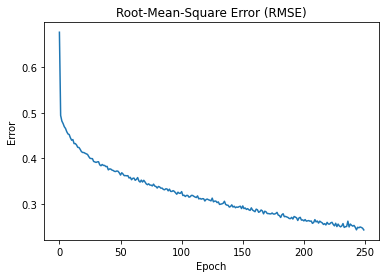

In [14]:
plt.plot(hist.history['root_mean_squared_error'])
plt.title('Root-Mean-Square Error (RMSE)')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [15]:
solcast.evaluate(x_train, y_train)

106/106 [==============================] - 0s 2ms/step - loss: 0.0535 - root_mean_squared_error: 0.2313


[0.05347723513841629, 0.23125144839286804]

## 6. Results

In [16]:
from sklearn.metrics import mean_squared_error
y_pred = solcast.predict(x_test) 
y_pred_orig = y_sc.inverse_transform(y_pred) 
y_test_orig = y_sc.inverse_transform(y_test) 
RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

478.8861428793778

In [17]:
train_pred = solcast.predict(x_train) 
train_pred_orig = y_sc.inverse_transform(train_pred) 
y_train_orig = y_sc.inverse_transform(y_train) 
mean_squared_error(train_pred_orig, y_train_orig, squared = False)

217.02078156183265

In [18]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7310441611562186

In [19]:
r2_score(train_pred_orig, y_train_orig)

0.9447877729369213

In [20]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[ 794.29553223,  772.99624   ],
       [ 612.90576172,  468.02361   ],
       [2378.38354492, 2706.2756    ],
       ...,
       [1871.09460449,  322.64611   ],
       [2455.19677734, 2467.6794    ],
       [ 979.93658447,  890.89      ]])

In [21]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[1881.83203125, 1730.1885    ],
       [1502.49365234,  904.50111   ],
       [1249.30212402, 1112.4367    ],
       ...,
       [ 708.53814697,  214.27725   ],
       [ 619.55072021,  344.17139   ],
       [1973.03112793, 1215.9592    ]])

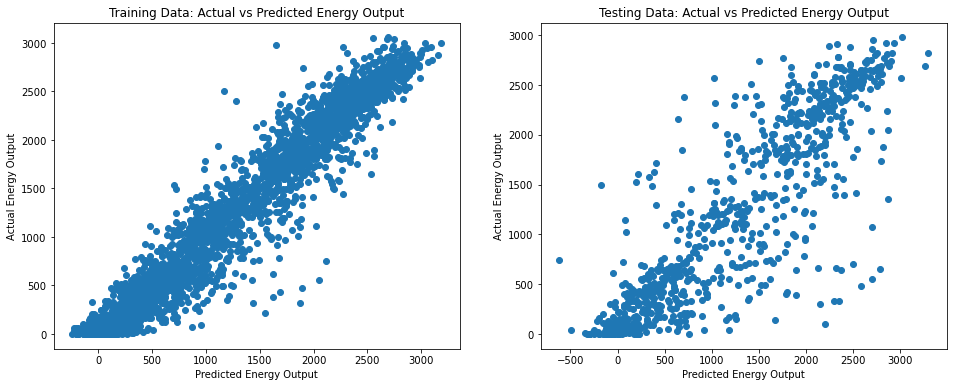

In [22]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Energy Output')
plt.ylabel('Actual Energy Output')
plt.title('Testing Data: Actual vs Predicted Energy Output')

plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Energy Output')
plt.ylabel('Actual Energy Output')
plt.title('Training Data: Actual vs Predicted Energy Output')
plt.show()

In [23]:
results = np.concatenate((y_pred_orig, y_test_orig), 1)
results = pd.DataFrame(data = results)
results.columns = ['Predicted Energy Output', 'Actual Energy Output']
pd.options.display.float_format = "{:,.2f}".format
results[42:50]

,Predicted Energy Output,Actual Energy Output
42,-29.67,101.29
43,487.15,426.06
44,"2,643.33","2,269.99"
45,"2,200.99","1,898.36"
46,"1,841.49","1,975.26"
47,"2,718.07","2,645.27"
48,"2,395.13","2,236.88"
49,"2,000.95","2,107.22"


In [24]:
sc = StandardScaler()
pred_whole = solcast.predict(sc.fit_transform(x))
pred_whole_orig = y_sc.inverse_transform(pred_whole)
pred_whole_orig

array([[ 544.54504 ],
       [1420.6473  ],
       [2028.4423  ],
       ...,
       [ 104.27897 ],
       [ 161.59775 ],
       [ -38.219814]], dtype=float32)

In [25]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

In [26]:
r2_score(pred_whole_orig, y)

0.9020179285814267

In [27]:
df_results = pd.DataFrame.from_dict({
    'Overall R2 Score': r2_score(pred_whole_orig, y),
    'R2 Score of Training Data': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Testing Data': r2_score(y_pred_orig, y_test_orig),
    'Mean of Testing Data': np.mean(y_pred_orig),
    'Standard Deviation of Testing Data': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
}, orient = 'index', columns = ['Value'])
display(df_results.style.background_gradient(cmap = 'afmhot', axis = 0))

,Value
Overall R2 Score,0.902018
R2 Score of Training Data,0.944788
R2 Score of Testing Data,0.731044
Mean of Testing Data,1172.208618
Standard Deviation of Testing Data,923.404114
Relative Standard Deviation,0.787747


In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index = data.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending = False)

,Feature Importance
shortwave_radiation_backwards_sfc,0.36
mean_sea_level_pressure_MSL,0.10
wind_speed_80_m_above_gnd,0.04
snowfall_amount_sfc,0.02
wind_direction_80_m_above_gnd,0.01
wind_direction_10_m_above_gnd,0.01
wind_speed_10_m_above_gnd,0.00
wind_direction_900_mb,-0.00
total_precipitation_sfc,-0.02
medium_cloud_cover_mid_cld_lay,-0.02


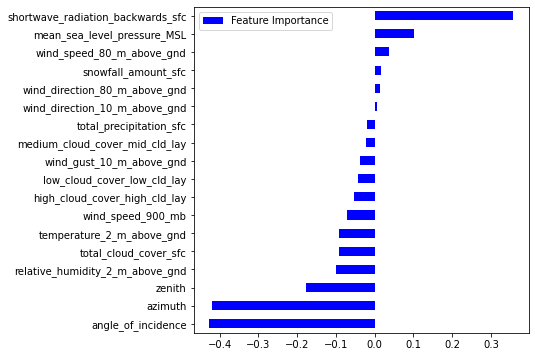

In [29]:
g = lasso_coeff[lasso_coeff['Feature Importance'] != 0].sort_values('Feature Importance').plot(kind = 'barh', figsize = (6,6), cmap = 'winter')